In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.style.use('ggplot')
# 声明使用 Seaborn 样式
sns.set()
# 有五种seaborn的绘图风格，它们分别是：darkgrid, whitegrid, dark, white, ticks。默认的主题是darkgrid。
sns.set_style("whitegrid")
# 有四个预置的环境，按大小从小到大排列分别为：paper, notebook, talk, poster。其中，notebook是默认的。
sns.set_context('notebook')
# 中文字体设置-黑体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

In [581]:
br.to_excel('/users/luozeming/Desktop/大三下/法律数据分析实践/only_bribe_all(5-23).xlsx',index=False)

In [472]:
df.to_csv('/users/luozeming/Desktop/大三下/法律数据分析实践/bribe_all(5-23).csv',index=False)

In [ ]:
df.to_excel('/users/luozeming/Desktop/大三下/法律数据分析实践/bribe_all(5-23).xlsx',index=False)

In [538]:
df.to_excel('/users/luozeming/Desktop/大三下/法律数据分析实践/1_bribe_all(5-23).xlsx',index=False)

In [3]:
df=pd.read_csv('/users/luozeming/Desktop/大三下/法律数据分析实践/only_bribe_all(5-24).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16114 entries, 0 to 16113
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   file_name   16114 non-null  object 
 1   caseid      16114 non-null  object 
 2   ctfacts     16114 non-null  object 
 3   ctreason    16114 non-null  object 
 4   decision    16114 non-null  object 
 5   fajin       16114 non-null  object 
 6   crime       16114 non-null  object 
 7   tuxing      16114 non-null  object 
 8   amounts     16114 non-null  object 
 9   max_amount  15834 non-null  float64
 10  penalty     8827 non-null   float64
 11  sentence    16114 non-null  float64
 12  huanxing    16114 non-null  object 
 13  probation   16114 non-null  float64
 14  actual_sen  16114 non-null  float64
 15  year        16093 non-null  float64
 16  province    16074 non-null  object 
 17  city        15884 non-null  object 
 18  county      14403 non-null  object 
 19  1_bribery   16114 non-nul

In [66]:
df.time=pd.to_datetime(df.time)

In [78]:
df['day']

0         NaN
1        22.0
2        15.0
3        28.0
4         NaN
         ... 
16109     4.0
16110     NaN
16111    26.0
16112    30.0
16113    23.0
Name: day, Length: 16114, dtype: float64

In [82]:
df['date']=df.apply(lambda x : str(x.year)+'-'+str(x.month)+"-"+str(x['day']),axis=1)
df.date

0          2015.0-nan-nan
1         2018.0-5.0-22.0
2         2014.0-8.0-15.0
3        2008.0-10.0-28.0
4          2016.0-nan-nan
               ...       
16109     2013.0-11.0-4.0
16110      2016.0-nan-nan
16111     2008.0-6.0-26.0
16112     2018.0-3.0-30.0
16113    2017.0-12.0-23.0
Name: date, Length: 16114, dtype: object

In [83]:
df['date']=pd.to_datetime(df.date.map(lambda x : None if 'nan' in x else x))

ParserError: Unknown string format: 2018.0-5.0-22.0

In [92]:
df=df.drop(['date'],axis=1)

# 数据分析

单变量分析
- 月份，描述，对应一下
【白建军】

- sentence-actual sentence，百分比分位数，频率分布直方图，罚金，

交叉分析：
- 每年的月份分布；

- 月份和平均刑期、标准差、离散系数；
- 省份和刑期的交叉分析，均值、标准差、分位数、离散系数；

新增变量
- 6.新增变量：刑期四档、三个时间段【2015.11.01 - 2016.04.18】
- 7.刑期四档与时间段交叉，前面与sentence交叉的变量再与四档刑期交叉

8.回归

## 新变量

### pre between after

In [77]:
df['day']=df.apply(lambda x:x.time.day ,axis=1)

In [68]:
df.day

0         NaN
1        22.0
2        15.0
3        28.0
4         NaN
         ... 
16109     4.0
16110     NaN
16111    26.0
16112    30.0
16113    23.0
Length: 16114, dtype: float64

In [85]:
df['pre']=df.apply(lambda x:1 if (x['year']<2015)or(x['year']==2015 and x.month<11) else 0,axis=1 )
df['between']=df.apply(lambda x:1 if (x['year']==2015 and x.month>=11) or ((x['year']==2016 and x.month==4 and x.day<18)or(x['year']==2016 and x.month<4))else 0,axis=1 )

In [89]:
df['after']=df.apply(
    lambda x:1 if (x['year']>2016) or (
        (x['year']==2016 and x.month>4) or (x['year']==2016 and (x.month==4 and x.day>18) )
                                           ) else 0,axis=1 )

In [93]:
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts,max_amount,...,province,city,county,1_bribery,time,month,pre,day,between,after
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[222500.0, 70000.0, 19998.5, 321998.5, 117500....",350000.0,...,江苏省,盐城市,盐都区,1,NaT,NaN,0,NaN,0,0
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...",12692187.0,...,广西壮族自治区,梧州市,岑溪市,1,2018-05-22,5.0,0,22.0,0,1
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,"[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...",110000.0,...,山东省,济南市,历下区,1,2014-08-15,8.0,1,15.0,0,0
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,"[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...",100200.0,...,浙江省,杭州市,西湖区,1,2022-10-28,10.0,1,28.0,0,0
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,"[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...",2458000.0,...,四川省,雅安市,名山区,1,NaT,NaN,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16109,10004.txt,浙江省嘉兴市南湖区人民法院（原浙江省嘉兴市秀城区人民法院）刑事判决书（2013）嘉南刑初字第...,查明：1、被告人匡××在担任嘉兴市广播电视总台副台长、兼任嘉兴华夏视联电视通信有限公司和嘉兴...,本院认为，被告人匡××身为国家工作人员，利用职务便利，为他人谋取利益，非法收受他人财物合计2...,判决如下：一、被告人匡××犯受贿罪，判处有期徒刑十年，并处没收财产六万元。（刑期从判决执行之...,none,受贿罪,有期徒刑十年,"[170000.0, 20000.0, 30000.0, 20000.0, 60000.0,...",257000.0,...,浙江省,嘉兴市,南湖区,1,2013-11-04,11.0,1,4.0,0,0
16110,2543.txt,怀远县人民法院刑事判决书（2016）皖0321刑初650号,查明：2013年初至2016年7月间，被告人胡怀远身为怀远县徐圩乡卫生院药剂科主任，利用负责...,本院认为：被告人胡怀远身为怀远县徐圩乡卫生院药剂科主任，利用负责该院药品采购计划申报工作的职...,判决如下：一、被告人胡怀远犯受贿罪，判处有期徒刑九个月，缓刑一年，罚金人民币118000元（...,人民币118000元,受贿罪,有期徒刑九个月,"[2.0, 8220.0, 0.8, 6400.0, 5.0, 1.5, 4.5, 4903...",100000.0,...,安徽省,蚌埠市,怀远县,1,NaT,NaN,0,NaN,0,0
16111,18458.txt,杭州市上城区人民法院刑事判决书（2008）上刑初字第137号,查明：（一）受贿犯罪部分2004年至2007年10月，被告人华勇在杭州市上城区文化广电新闻出...,本院认为，被告人华勇身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人华勇犯受贿罪，判处有期徒刑五年四个月；犯介绍贿赂罪，判处有期徒刑六个月；...,none,受贿罪,有期徒刑五年四个月,"[76200.0, 5000.0, 1000.0, 2000.0, 1000.0, 6.0,...",90000.0,...,浙江省,杭州市,上城区,1,2022-06-26,6.0,1,26.0,0,0
16112,3885.txt,南京市溧水区人民法院刑事判决书（2018）苏0117刑初11号,查明：受贿2004年9月至2017年1月期间，被告人张某利用担任南京市溧水（县）区人民医院财...,本院认为，被告人张某身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人谋...,判决如下：一、被告人张某犯受贿罪，判处有期徒刑二年二个月，罚金人民币十五万元；犯挪用公款罪，...,人民币十五万元,受贿罪,有期徒刑二年二个月,"[233000.0, 76000.0, 4000.0, 83000.0, 12000.0, ...",563621.0,...,江苏省,南京市,溧水区,1,2018-03-30,3.0,0,30.0,0,1


### first second third fourth

In [110]:
0.==0

True

In [112]:
(df.actual_sen==0).sum()

43

In [94]:
df['first']=df.actual_sen.map(lambda x : 1 if x==0 else 0)
df['second']=df.actual_sen.map(lambda x : 1 if x>0 and x<=36 else 0)
df['third']=df.actual_sen.map(lambda x : 1 if x>36 and x<=120 else 0)
df['fourth']=df.actual_sen.map(lambda x : 1 if x>=120 else 0)

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts,max_amount,...,time,month,pre,day,between,after,first,second,third,fourth
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[222500.0, 70000.0, 19998.5, 321998.5, 117500....",350000.0,...,NaT,NaN,0,NaN,0,0,0,1,0,0
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...",12692187.0,...,2018-05-22,5.0,0,22.0,0,1,0,0,1,0
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,"[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...",110000.0,...,2014-08-15,8.0,1,15.0,0,0,0,1,0,0
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,"[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...",100200.0,...,2022-10-28,10.0,1,28.0,0,0,0,0,1,1
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,"[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...",2458000.0,...,NaT,NaN,0,NaN,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16109,10004.txt,浙江省嘉兴市南湖区人民法院（原浙江省嘉兴市秀城区人民法院）刑事判决书（2013）嘉南刑初字第...,查明：1、被告人匡××在担任嘉兴市广播电视总台副台长、兼任嘉兴华夏视联电视通信有限公司和嘉兴...,本院认为，被告人匡××身为国家工作人员，利用职务便利，为他人谋取利益，非法收受他人财物合计2...,判决如下：一、被告人匡××犯受贿罪，判处有期徒刑十年，并处没收财产六万元。（刑期从判决执行之...,none,受贿罪,有期徒刑十年,"[170000.0, 20000.0, 30000.0, 20000.0, 60000.0,...",257000.0,...,2013-11-04,11.0,1,4.0,0,0,0,0,1,1
16110,2543.txt,怀远县人民法院刑事判决书（2016）皖0321刑初650号,查明：2013年初至2016年7月间，被告人胡怀远身为怀远县徐圩乡卫生院药剂科主任，利用负责...,本院认为：被告人胡怀远身为怀远县徐圩乡卫生院药剂科主任，利用负责该院药品采购计划申报工作的职...,判决如下：一、被告人胡怀远犯受贿罪，判处有期徒刑九个月，缓刑一年，罚金人民币118000元（...,人民币118000元,受贿罪,有期徒刑九个月,"[2.0, 8220.0, 0.8, 6400.0, 5.0, 1.5, 4.5, 4903...",100000.0,...,NaT,NaN,0,NaN,0,0,0,1,0,0
16111,18458.txt,杭州市上城区人民法院刑事判决书（2008）上刑初字第137号,查明：（一）受贿犯罪部分2004年至2007年10月，被告人华勇在杭州市上城区文化广电新闻出...,本院认为，被告人华勇身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人华勇犯受贿罪，判处有期徒刑五年四个月；犯介绍贿赂罪，判处有期徒刑六个月；...,none,受贿罪,有期徒刑五年四个月,"[76200.0, 5000.0, 1000.0, 2000.0, 1000.0, 6.0,...",90000.0,...,2022-06-26,6.0,1,26.0,0,0,0,0,1,0
16112,3885.txt,南京市溧水区人民法院刑事判决书（2018）苏0117刑初11号,查明：受贿2004年9月至2017年1月期间，被告人张某利用担任南京市溧水（县）区人民医院财...,本院认为，被告人张某身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人谋...,判决如下：一、被告人张某犯受贿罪，判处有期徒刑二年二个月，罚金人民币十五万元；犯挪用公款罪，...,人民币十五万元,受贿罪,有期徒刑二年二个月,"[233000.0, 76000.0, 4000.0, 83000.0, 12000.0, ...",563621.0,...,2018-03-30,3.0,0,30.0,0,1,0,1,0,0


### period，rank

In [113]:
df.between.sum()

460

In [117]:
df['period']=df.apply(lambda x :'pre' if x.pre==1 else('between' if x['between']==1 else('after' if x.after==1 else 'none')),axis=1)

In [118]:
df.period.unique()

array(['none', 'after', 'pre', 'between'], dtype=object)

In [114]:
df['rank']=df.apply(lambda x :'first' if x['first']==1 else
                    ('second' if x.second==1 else('third' if x.third==1 else ('fourth' if x.fourth==1 else'none'))),axis=1)

In [115]:
df['rank'].unique()

array(['second', 'third', 'fourth', 'first'], dtype=object)

In [139]:
df.to_csv('/users/luozeming/Desktop/大三下/法律数据分析实践/for_analyzing(5-24).csv',index=False)

In [140]:
df.to_excel('/users/luozeming/Desktop/大三下/法律数据分析实践/for_analyzing(5-24).xlsx',index=False)

# 单变量分析

In [17]:
float(None)

TypeError: float() argument must be a string or a number, not 'NoneType'

In [19]:
np.nan

nan

In [18]:
df['year']=df['year'].map(lambda x :int(x) if x!=np.nan else x)

ValueError: cannot convert float NaN to integer

<BarContainer object of 18 artists>

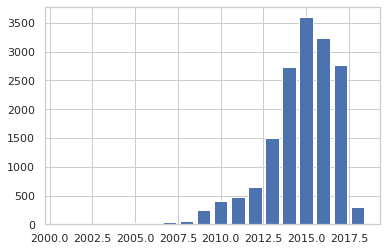

In [12]:
plt.bar(df.groupby('year').size().index,df.groupby('year').size())

In [13]:
df.groupby('year').size()

year
2001.0       4
2002.0      10
2003.0       5
2004.0      18
2005.0      14
2006.0      14
2007.0      39
2008.0      52
2009.0     256
2010.0     399
2011.0     480
2012.0     655
2013.0    1502
2014.0    2730
2015.0    3598
2016.0    3235
2017.0    2776
2018.0     306
dtype: int64

(array([  14.,   23.,   28.,   39.,  308.,  879.,  655., 4232., 6833.,
        3082.]),
 array([2001. , 2002.7, 2004.4, 2006.1, 2007.8, 2009.5, 2011.2, 2012.9,
        2014.6, 2016.3, 2018. ]),
 <BarContainer object of 10 artists>)

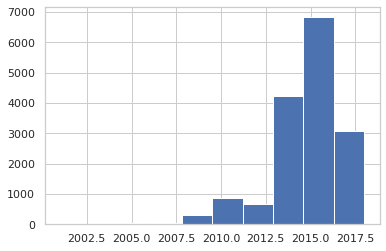

In [7]:
plt.hist(df['year'])

## 月份

In [20]:
df.groupby('month').size()

month
1.0      625
2.0      467
3.0      678
4.0      682
5.0     1186
6.0     1188
7.0     1081
8.0     1128
9.0     1161
10.0     973
11.0    1461
12.0    2062
dtype: int64

(array([3700., 2690., 2746.,  838., 3324., 1227.,  269., 1600.,  607.,
         197.,  449.,  231.,  137.,   23.,  942.,  692.,   63.,  202.,
          60.,   12.,   38.,   36.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,   27.]),
 array([  0. ,   8.4,  16.8,  25.2,  33.6,  42. ,  50.4,  58.8,  67.2,
         75.6,  84. ,  92.4, 100.8, 109.2, 117.6, 126. , 134.4, 142.8,
        151.2, 159.6, 168. , 176.4, 184.8, 193.2, 201.6, 210. , 218.4,
        226.8, 235.2, 243.6, 252. , 260.4, 268.8, 277.2, 285.6, 294. ,
        302.4, 310.8, 319.2, 327.6, 336. , 344.4, 352.8, 361.2, 369.6,
        378. , 386.4, 394.8, 403.2, 411.6, 420. ]),
 <BarContainer object of 50 artists>)

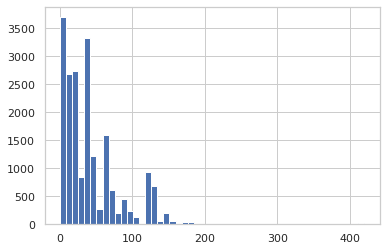

In [490]:
plt.hist(df.sentence,bins=50)

(array([ 626.,  470.,  680.,  683., 1193., 1194., 1087., 1131., 1172.,
         979., 1474., 2070.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <BarContainer object of 12 artists>)

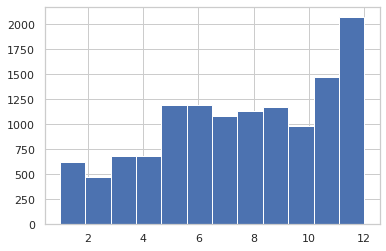

In [576]:
plt.hist(df.month[df['1_bribery']==1],bins=12)

KeyboardInterrupt: 

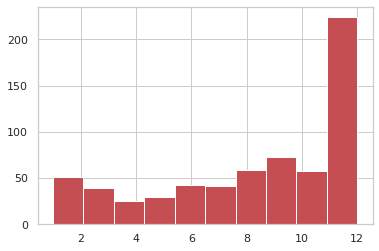

In [24]:
import time
for i in range(2009,2019):
    plt.hist(df.month[df['year']==float(i)])
    # time.sleep(5)

In [27]:
2016.0==2016

True

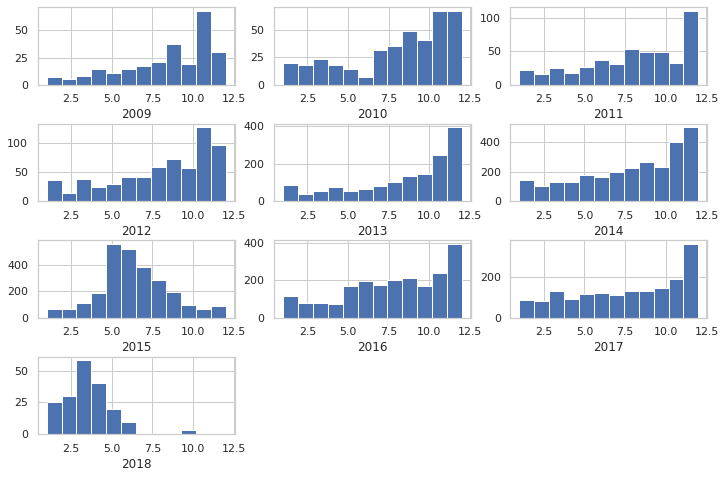

In [62]:
plt.figure(figsize=(12,10))
# fig,axes = plt.subplots(4,3,sharey=True)

for i in range(2009,2019):
    j=i-2008
    plt.subplot(5,3,j)
    plt.hist(df.month[df['year']==i],bins=12,range=(1,12))
    # plt.ylabel('cases')
    plt.xlabel('{}'.format(i))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.2,hspace=0.5)
# 图与图之间的间距调整wspace=0.15,hspace=0.15


## 刑期

In [181]:
df==1

False

### sentence

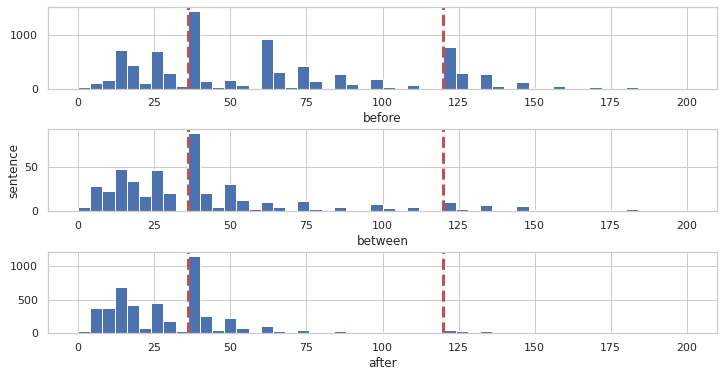

In [273]:
plt.figure(figsize=(12,6))

plt.subplot(311)
plt.hist(df.sentence[df['pre']==1],bins=50,range=(0,200))
plt.axvline(x=36,c='r',linestyle='--',linewidth=3)
plt.axvline(x=120,c='r',linestyle='--',linewidth=3)
plt.xlabel('before')


plt.subplot(312)
plt.hist(df.sentence[df['between']==1],bins=50,range=(0,200))
plt.axvline(x=36,c='r',linestyle='--',linewidth=3)
plt.axvline(x=120,c='r',linestyle='--',linewidth=3)
plt.xlabel('between')
plt.ylabel('sentence')

plt.subplot(313)
plt.hist(df.sentence[df['after']==1],bins=50,range=(0,200))
plt.axvline(x=36,c='r',linestyle='--',linewidth=3)
plt.axvline(x=120,c='r',linestyle='--',linewidth=3)
plt.xlabel('after')

plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.2,hspace=0.5)
# 图与图之间的间距调整wspace=0.15,hspace=0.15


### actual_sen

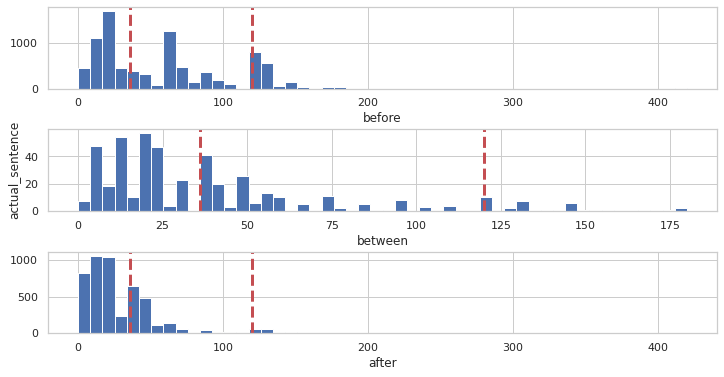

In [199]:
plt.figure(figsize=(12,6))

plt.subplot(311)
plt.hist(df.actual_sen[df['pre']==1],bins=50)
plt.axvline(x=36,c='r',linestyle='--',linewidth=3)
plt.axvline(x=120,c='r',linestyle='--',linewidth=3)
plt.xlabel('before')


plt.subplot(312)
plt.hist(df.actual_sen[df['between']==1],bins=50)
plt.axvline(x=36,c='r',linestyle='--',linewidth=3)
plt.axvline(x=120,c='r',linestyle='--',linewidth=3)
plt.xlabel('between')
plt.ylabel('actual_sentence')

plt.subplot(313)
plt.hist(df.actual_sen[df['after']==1],bins=50)
plt.axvline(x=36,c='r',linestyle='--',linewidth=3)
plt.axvline(x=120,c='r',linestyle='--',linewidth=3)
plt.xlabel('after')

plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.2,hspace=0.5)
# 图与图之间的间距调整wspace=0.15,hspace=0.15



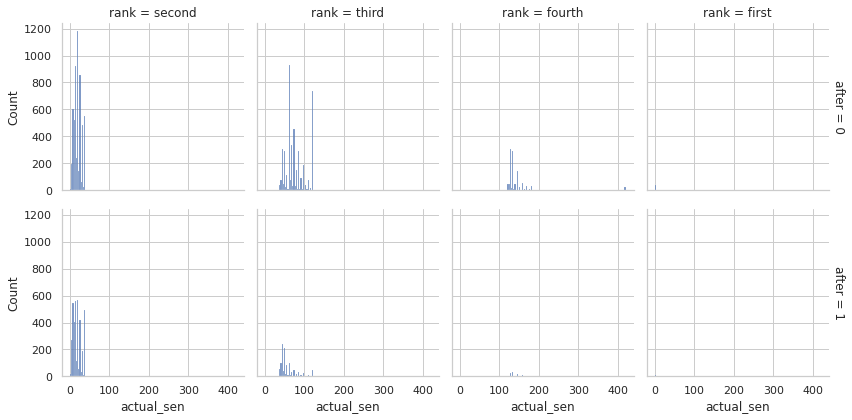

In [267]:
sns.displot(
    df, x="actual_sen", col="rank", row="after",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

## 罚金

(array([3.500e+01, 1.080e+02, 3.683e+03, 4.691e+03, 2.860e+02, 2.200e+01,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 7.60090246,  9.03841509, 10.47592773, 11.91344036, 13.350953  ,
        14.78846563, 16.22597827, 17.6634909 , 19.10100354, 20.53851617,
        21.97602881]),
 <BarContainer object of 10 artists>)

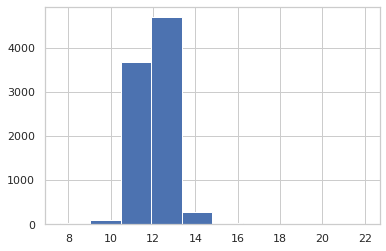

In [162]:
plt.hist(np.log(df.penalty))

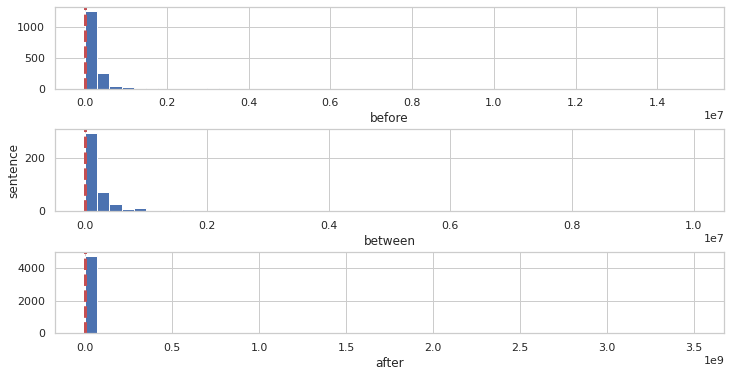

In [200]:
plt.figure(figsize=(12,6))

plt.subplot(311)
plt.hist(df.penalty[df['pre']==1],bins=50)
plt.axvline(x=36,c='r',linestyle='--',linewidth=3)
plt.axvline(x=120,c='r',linestyle='--',linewidth=3)
plt.xlabel('before')


plt.subplot(312)
plt.hist(df.penalty[df['between']==1],bins=50)
plt.axvline(x=36,c='r',linestyle='--',linewidth=3)
plt.axvline(x=120,c='r',linestyle='--',linewidth=3)
plt.xlabel('between')
plt.ylabel('sentence')

plt.subplot(313)
plt.hist(df.penalty[df['after']==1],bins=50)
plt.axvline(x=36,c='r',linestyle='--',linewidth=3)
plt.axvline(x=120,c='r',linestyle='--',linewidth=3)
plt.xlabel('after')

plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.2,hspace=0.5)
# 图与图之间的间距调整wspace=0.15,hspace=0.15



# 交叉分析

单变量分析
- 月份，描述，对应一下
【白建军】

- sentence-actual sentence，百分比分位数，频率分布直方图，罚金，

交叉分析：
- 每年的月份分布；

- 月份和平均刑期、标准差、离散系数；
- 省份和刑期的交叉分析，均值、标准差、分位数、离散系数；

新增变量
- 6.新增变量：刑期四档、三个时间段【2015.11.01 - 2016.04.18】
- 7.刑期四档与时间段交叉，前面与sentence交叉的变量再与四档刑期交叉

8.回归

## amout-sen

In [248]:
df['lnamout']=np.log(df.max_amount)

(0.0, 60.0)

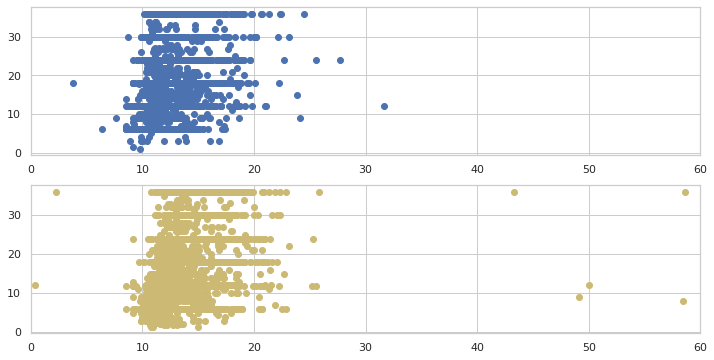

In [259]:
plt.figure(figsize=(12,6))
plt.subplot(211)
plt.scatter(df.lnamout[df['rank']=='second'][df['pre']==1],df.actual_sen[df['rank']=='second'][df['pre']==1])
plt.xlim((0,60))

plt.subplot(212)
plt.scatter(df.lnamout[df['rank']=='second'][df['pre']==0],df.actual_sen[df['rank']=='second'][df['pre']==0],c='y')
plt.xlim((0,60))


(0.0, 60.0)

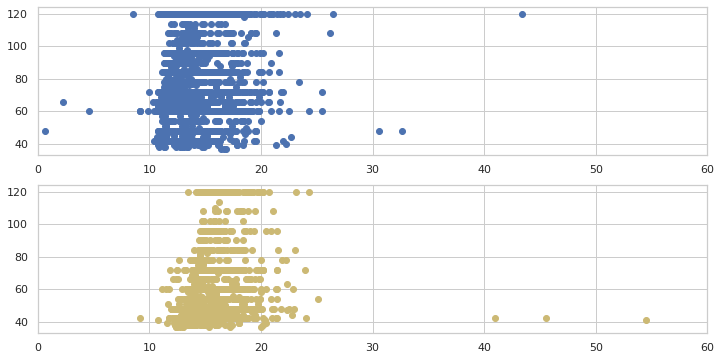

In [265]:
plt.figure(figsize=(12,6))
rank='third'
plt.subplot(211)
plt.scatter(df.lnamout[df['rank']==rank][df['pre']==1],df.actual_sen[df['rank']==rank][df['pre']==1])
plt.xlim((0,60))


plt.subplot(212)
plt.scatter(df.lnamout[df['rank']==rank][df['pre']==0],df.actual_sen[df['rank']==rank][df['pre']==0],c='y')
plt.xlim((0,60))


(0.0, 60.0)

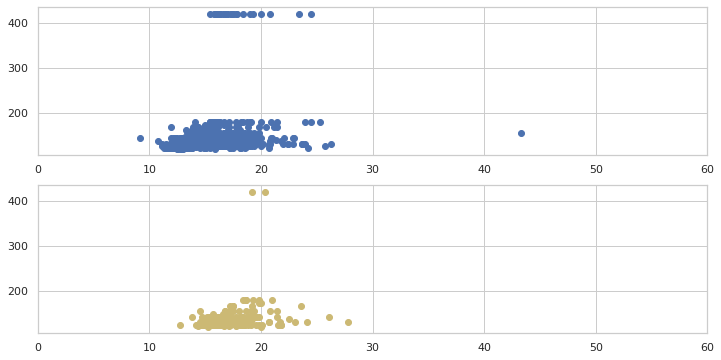

In [266]:
plt.figure(figsize=(12,6))
rank='fourth'
plt.subplot(211)
plt.scatter(df.lnamout[df['rank']==rank][df['pre']==1],df.actual_sen[df['rank']==rank][df['pre']==1])
plt.xlim((0,60))


plt.subplot(212)
plt.scatter(df.lnamout[df['rank']==rank][df['pre']==0],df.actual_sen[df['rank']==rank][df['pre']==0],c='y')
plt.xlim((0,60))



ValueError: Contour levels must be increasing

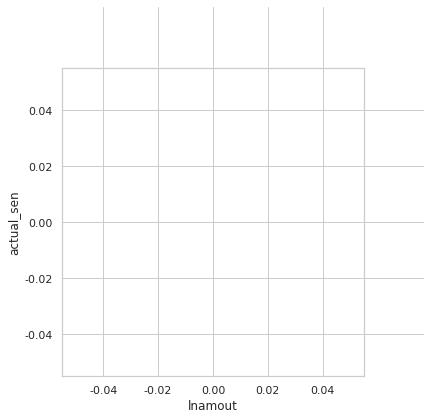

In [268]:
g = sns.JointGrid(data=df, x="lnamout", y="actual_sen", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

## month-sen

In [97]:
df.groupby('month').actual_sen.agg([np.mean,np.median,np.std])

,mean,median,std
month,,,
1.0,48.581483,30.012,42.974708
2.0,48.159865,30.000,47.773023
3.0,51.351524,36.000,44.981781
4.0,51.244521,36.000,45.649404
5.0,42.325855,24.024,40.519634
6.0,43.948625,30.000,41.813442
7.0,47.885901,36.000,39.158984
8.0,47.206307,33.000,44.347575
9.0,50.291911,36.000,45.316322


## period-sen

In [132]:
df.groupby('period').actual_sen.agg([np.mean,np.median,np.std,len])

,mean,median,std,len
period,,,,
after,28.363375,18.036,26.754811,4861
between,37.685552,24.024,35.467308,460
none,30.432064,22.500,27.818844,2142
pre,58.376586,48.000,47.397850,8651


## period-rank

In [126]:
'first second third fourth'.split()

['first', 'second', 'third', 'fourth']

In [138]:
df.groupby(['period','rank']).size()

period   rank  
after    first        8
         fourth      94
         second    3672
         third     1087
between  first        3
         fourth      22
         second     300
         third      135
none     first        4
         fourth      57
         second    1524
         third      557
pre      first       28
         fourth     990
         second    3963
         third     3670
dtype: int64

In [147]:
for name, data in df.groupby('period'):
    print(name,data.groupby('rank').size())

after rank
first        8
fourth      94
second    3672
third     1087
dtype: int64
between rank
first       3
fourth     22
second    300
third     135
dtype: int64
none rank
first        4
fourth      57
second    1524
third      557
dtype: int64
pre rank
first       28
fourth     990
second    3963
third     3670
dtype: int64


In [146]:
df.groupby('rank').actual_sen.agg([np.mean,np.median,np.std,len])

,mean,median,std,len
rank,,,,
first,0.000000,0.0,0.000000,43
fourth,142.453138,132.0,44.784185,1163
second,18.092932,18.0,9.495524,9459
third,71.315287,63.0,25.638972,5449


## province-sen

In [130]:
df.groupby('province').actual_sen.agg([np.mean,np.median,np.std,len])

,mean,median,std,len
province,,,,
上海市,37.971390,18.036,41.286072,439
云南省,45.426950,30.000,48.765086,496
内蒙古自治区,41.538911,27.012,54.720112,90
北京市,57.710915,42.000,58.619642,260
吉林省,40.901610,30.000,43.601341,210
四川省,38.638779,24.000,37.498241,1013
天津市,54.374431,36.000,48.416649,65
宁夏回族自治区,55.158471,36.000,60.763913,85
安徽省,44.314869,30.012,42.715919,971


## province-period-sen

### pre

In [158]:
df[df.period=='pre'].groupby('province').actual_sen.agg([np.mean,np.median,np.std,len])

,mean,median,std,len
province,,,,
上海市,45.773599,24.024,46.212390,282
云南省,59.157777,42.000,57.625624,269
内蒙古自治区,63.945765,42.000,76.389265,34
北京市,69.535161,54.000,72.210270,124
吉林省,50.807581,36.000,55.502553,86
四川省,56.754845,42.000,45.680055,296
天津市,70.671067,54.000,54.525167,15
宁夏回族自治区,96.803067,87.500,75.437627,30
安徽省,69.415027,63.000,50.646580,407


### between

In [159]:
df[df.period=='between'].groupby('province').actual_sen.agg([np.mean,np.median,np.std,len])

,mean,median,std,len
province,,,,
上海市,42.000000,42.000,NaN,1
云南省,36.522000,24.024,33.410074,33
内蒙古自治区,29.007000,28.515,14.778205,6
北京市,80.943647,96.000,53.565096,17
吉林省,68.666667,48.000,44.736264,3
四川省,29.946824,18.012,31.466897,17
天津市,180.000000,180.000,NaN,1
宁夏回族自治区,44.008000,36.000,24.970386,3
安徽省,39.129500,26.000,34.369676,8


### after

In [160]:
df[df.period=='after'].groupby('province').actual_sen.agg([np.mean,np.median,np.std,len])

,mean,median,std,len
province,,,,
上海市,20.257012,12.024,23.019531,80
云南省,27.656608,18.036,26.901783,189
内蒙古自治区,30.247879,18.036,35.518077,33
北京市,41.207085,36.000,34.171987,118
吉林省,33.349050,24.024,30.821404,120
四川省,25.344523,18.024,22.687717,369
天津市,44.970143,25.500,43.734618,28
宁夏回族自治区,31.349268,18.012,35.454888,41
安徽省,24.981407,18.012,22.429817,206


In [155]:
for name, data in df.groupby('province'):
    print(name,data.groupby('period').actual_sen.agg([np.mean,np.median,np.std,len]))

上海市               mean  median        std  len
period                                    
after    20.257012  12.024  23.019531   80
between  42.000000  42.000        NaN    1
none     27.614789  18.006  26.879617   76
pre      45.773599  24.024  46.212390  282
云南省               mean  median        std  len
period                                    
after    27.656608  18.036  26.901783  189
between  36.522000  24.024  33.410074   33
none     37.200000  36.000  22.609732    5
pre      59.157777  42.000  57.625624  269
内蒙古自治区               mean  median        std  len
period                                    
after    30.247879  18.036  35.518077   33
between  29.007000  28.515  14.778205    6
none     23.066118  18.036  16.666675   17
pre      63.945765  42.000  76.389265   34
北京市                mean  median        std  len
period                                     
after     41.207085    36.0  34.171987  118
between   80.943647    96.0  53.565096   17
none     144.000000   144.0    

### 北京，河北，湖北

In [208]:
for name, dt in df[df.province.isin(['北京市'])].groupby('period'):
    print(name,dt.groupby('rank').size())

after rank
fourth     5
second    66
third     47
dtype: int64
between rank
fourth    5
second    7
third     5
dtype: int64
none rank
fourth    1
dtype: int64
pre rank
first      2
fourth    22
second    53
third     47
dtype: int64


In [209]:
for name, dt in df[df.province.isin(['河北省'])].groupby('period'):
    print(name,dt.groupby('rank').size())

after rank
fourth     2
second    97
third     35
dtype: int64
between rank
second    7
third     3
dtype: int64
none rank
second    13
third      4
dtype: int64
pre rank
first       1
fourth     12
second    105
third      43
dtype: int64


In [210]:
for name, dt in df[df.province.isin(['湖北省'])].groupby('period'):
    print(name,dt.groupby('rank').size())

after rank
fourth      2
second    297
third      65
dtype: int64
between rank
second    38
third     13
dtype: int64
none rank
second    18
third      6
dtype: int64
pre rank
first       2
fourth     20
second    230
third     149
dtype: int64


## rank-sen

In [218]:
def cal_CV(dt):
    if np.mean(dt)!=0:
        return np.std(dt)/np.mean(dt)
    else:
        return 0

In [214]:
df[df['rank']=='second'].groupby('period').actual_sen.agg([np.mean,np.median,np.std,cal_CV,len])

,mean,median,std,cal_CV,len
period,,,,,
after,17.396886,15.013,10.114586,0.581323,3672
between,18.311180,18.012,9.649446,0.526091,300
none,17.245066,15.000,9.923518,0.575252,1524
pre,19.047399,18.024,8.598105,0.451349,3963


In [215]:
df[df['rank']=='third'].groupby('period').actual_sen.agg([np.mean,np.median,np.std,cal_CV,len])

,mean,median,std,cal_CV,len
period,,,,,
after,55.758050,48.0,20.224736,0.362556,1087
between,64.118519,54.0,24.422601,0.379484,135
none,55.798923,48.0,19.845332,0.355339,557
pre,78.542779,72.0,24.721269,0.314706,3670


In [216]:
df[df['rank']=='fourth'].groupby('period').actual_sen.agg([np.mean,np.median,np.std,cal_CV,len])

,mean,median,std,cal_CV,len
period,,,,,
after,142.382979,132.0,43.162386,0.301526,94
between,144.818182,144.0,16.797495,0.113323,22
none,137.263158,132.0,13.540319,0.097776,57
pre,142.706061,132.0,46.509743,0.325748,990


## province-rank-sen

### pre

In [247]:
prs1=df[df['rank']=='second'][df.period=='pre'].groupby('province').actual_sen.agg([np.mean,np.median,cal_CV,len])
ps1=prs1.sort_values(by=['len'],ascending=False).iloc[:20,:]
ps1.sort_values(by=['province'])

,mean,median,cal_CV,len
province,,,,
上海市,15.516288,15.030,0.435592,163
云南省,19.873603,18.024,0.455077,131
北京市,19.252075,18.000,0.573230,53
四川省,17.854142,18.012,0.492623,141
安徽省,19.772773,18.036,0.440822,150
山东省,17.669601,18.012,0.481748,341
山西省,18.854338,18.036,0.527839,71
广东省,17.369658,18.000,0.433387,226
广西壮族自治区,18.377707,18.006,0.458915,150


In [246]:
prs1=df[df['rank']=='second'][df.period=='after'].groupby('province').actual_sen.agg([np.mean,np.median,cal_CV,len])
ps1=prs1.sort_values(by=['len'],ascending=False).iloc[:20,:]
ps1.sort_values(by=['province'])

,mean,median,cal_CV,len
province,,,,
云南省,17.323020,18.000,0.517072,152
吉林省,18.766116,18.006,0.561414,86
四川省,16.495353,12.024,0.558151,295
安徽省,16.923172,12.024,0.677228,167
山东省,14.625198,12.000,0.689863,202
广东省,17.808351,15.000,0.512656,239
广西壮族自治区,15.776000,12.006,0.611498,139
新疆维吾尔自治区,19.608875,18.024,0.510765,80
江苏省,21.519192,20.000,0.499538,193


In [245]:
prs2=df[df['rank']=='third'][df.period=='pre'].groupby('province').actual_sen.agg([np.mean,np.median,cal_CV,len])
ps2=prs2.sort_values(by=['len'],ascending=False).iloc[:20,:]
ps2.sort_values(by=['province'])

,mean,median,cal_CV,len
province,,,,
上海市,71.000000,63.0,0.289508,94
云南省,75.075472,66.0,0.314573,106
北京市,80.553191,72.0,0.340379,47
四川省,75.582609,72.0,0.314416,115
安徽省,85.000000,84.0,0.290921,199
山东省,80.087912,72.0,0.324406,182
广东省,74.511364,66.0,0.293135,176
广西壮族自治区,76.103093,66.0,0.340057,97
新疆维吾尔自治区,80.450980,78.0,0.319419,51


In [235]:
prs3=df[df['rank']=='fourth'][df.period=='pre'].groupby('province').actual_sen.agg([np.mean,np.median,cal_CV,len])
prs3=prs3.sort_values(by=['len'],ascending=False).iloc[:20,:]
prs3.sort_values(by=['mean'])

,mean,median,cal_CV,len
province,,,,
重庆市,130.956522,126.0,0.070652,23
广西壮族自治区,132.823529,132.0,0.054182,17
浙江省,133.016393,126.0,0.163228,244
贵州省,134.416667,132.0,0.095166,36
福建省,135.823529,132.0,0.104638,51
陕西省,137.142857,132.0,0.077308,14
四川省,139.750000,132.0,0.113420,40
江西省,143.600000,138.0,0.137496,15
安徽省,144.327586,132.0,0.369399,58


In [243]:
for i  in ['second','third','fourth']:
    prs=df[df['rank']==i][df.province.isin(['河北省'])].groupby('period').actual_sen.agg([np.mean,np.median,cal_CV,len])
    prs=prs.sort_values(by=['len'],ascending=False).iloc[:20,:]
    print(prs.sort_values(by=['period']))

              mean  median    cal_CV  len
period                                   
after    18.708680  18.012  0.558703   97
between  10.577714  12.000  0.374981    7
none     17.700462  12.016  0.564031   13
pre      20.550692  18.036  0.443238  105
               mean  median    cal_CV  len
period                                    
after     62.571429    54.0  0.378916   35
between  106.000000   102.0  0.096208    3
none      66.000000    69.0  0.231774    4
pre       75.000000    72.0  0.347179   43
         mean  median    cal_CV  len
period                              
after   129.0   129.0  0.023256    2
pre     158.0   132.0  0.502438   12
